# GBM Geometry Demo


**gbmeometry** is a module with routines for handling GBM geometry. It performs a few tasks:
* creates an astropy coordinate frame for Fermi GBM given a quarternion and spacecraft position
* allows for coordinate transforms from Fermi frame to an astropy frame (J2000, etc.)
* plots the GBM NaI detectors at a given time for a given FOV
* determines if an astropy SkyCoord location is within a NaI's FOV
* creates interpolations over GBM quarternions and SC coordinates


In [1]:
%matplotlib inline
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
from gbmgeometry import *
from gbmgeometry.utils.package_utils import get_path_of_data_file



## Interpolating the spacecraft position
First let's create an interpolating object for a given TRIGDAT file (POSHIST files are also readable)


In [2]:
interp = PositionInterpolator.from_trigdat(get_path_of_data_file("glg_trigdat_all_bn080916009_v02.fit"))

The quaternion and sc_pos functions can take as inputs the time since trigger

In [3]:
#
print ("Quaternions")
print (interp.quaternion(0))
print (interp.quaternion(10))
print
print ("SC XYZ")
print (interp.sc_pos(0))
print (interp.sc_pos(10))





Quaternions
[0.09894184 0.81399423 0.56763536 0.07357984]
[0.09651158 0.81315938 0.56970097 0.06998621]
SC XYZ
[3184.75 5985.5  1456.75]
[3111.77432458 6015.91372132 1488.98009345]


## Single GBM detector properties

One can look at a single detector which knows about it's orientation in the Fermi SC coordinates as well as where it is currently pointing on its optical axis in J2000. In fact, since the GBM  frame is part of the astropy coordinate family, it can be transformed into any system!







In [4]:
interp.quaternion(1)

array([0.0986775 , 0.81390325, 0.56786244, 0.07318777])

In [5]:
na = NaIA(interp.quaternion(1))
print (na.center)
print (na.center_icrs) #J2000
print (na.center.galactic) # Galactic
 
print ("Changing in time")
na.set_quaternion(interp.quaternion(100))

print (na.center)
print (na.center_icrs) #J2000
print (na.center.galactic) # Galactic
 

<SkyCoord (GBMFrame: sc_pos_X=None, sc_pos_Y=None, sc_pos_Z=None, quaternion_1=0.09867749622828526, quaternion_2=0.8139032523975553, quaternion_3=0.5678624418045289, quaternion_4=0.07318777342560503): (lon, lat) in deg
    (123.73, -0.42)>
<SkyCoord (ICRS): (ra, dec) in deg
    (12.8426513, 51.9249513)>
<SkyCoord (Galactic): (l, b) in deg
    (122.92135609, -10.94679491)>
Changing in time
<SkyCoord (GBMFrame: sc_pos_X=None, sc_pos_Y=None, sc_pos_Z=None, quaternion_1=0.07365115360430513, quaternion_2=0.8058104624624784, quaternion_3=0.5863608294681484, quaternion_4=0.037717550642801925): (lon, lat) in deg
    (123.73, -0.42)>
<SkyCoord (ICRS): (ra, dec) in deg
    (14.14827804, 51.13038764)>
<SkyCoord (Galactic): (l, b) in deg
    (123.75793083, -11.73309177)>


#### We can also go back into the GBMFrame 

In [6]:
center_j2000 = na.center_icrs
center_j2000

<SkyCoord (ICRS): (ra, dec) in deg
    (14.14827804, 51.13038764)>

In [7]:
center_j2000.transform_to(GBMFrame(**interp.quaternion_dict(100.)))

<SkyCoord (GBMFrame: sc_pos_X=None, sc_pos_Y=None, sc_pos_Z=None, quaternion_1=0.07365115360430513, quaternion_2=0.8058104624624784, quaternion_3=0.5863608294681484, quaternion_4=0.037717550642801925): (lon, lat) in deg
    (123.73020963, -0.4198826)>

### Earth Centered Coordinates

The sc_pos are Earth centered coordinates (in km for trigdat and m for poshist) and can also be passed. It is a good idea to specify the units!




In [8]:
na = NaIA(interp.quaternion(0),interp.sc_pos(0)*u.km)
na.get_center()

<SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
    (123.73, -0.42)>

## Working with the GBM class

Ideally, we want to know about many detectors. The GBM class performs operations on all detectors for ease of use. It also has plotting capabilities.

In [9]:
myGBM = GBM(interp.quaternion(0),sc_pos=interp.sc_pos(0)*u.km)

We can either plot the detectors with a field of view:

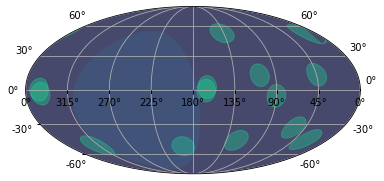

In [10]:
myGBM.plot_detector_pointings(fov=10);

or just where the optical axis is pointing

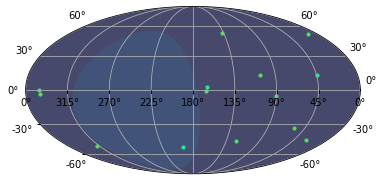

In [11]:
myGBM.plot_detector_pointings(c='y', alpha=1,s=10);

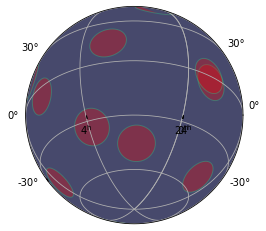

In [12]:
myGBM.plot_detector_pointings(fov=10, facecolor='r', projection = "astro globe", center = SkyCoord(30, -30, unit='deg', frame="icrs"), show_earth=False);

In [13]:

myGBM.get_centers()



[<SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
     (45.89, 69.42)>,
 <SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
     (45.11, 44.69)>,
 <SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon, lat) in deg
     (58.44, -0.21)>,
 <SkyCoord (GBMFrame: sc_pos_X=3184.75 km, sc_pos_Y=5985.5 km, sc_pos_Z=1456.75 km, quaternion_1=0.09894184023141861, quaternion_2=0.8139942288398743, quaternion_3=0.5676353573799133, quaternion_4=0.07357984036207199): (lon

In [14]:
[x.icrs for x in myGBM.get_centers()]

[<SkyCoord (ICRS): (ra, dec) in deg
     (90.02053912, -5.02944102)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (106.9639318, 13.09532427)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (137.09793576, 52.86180786)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (121.3144115, -45.95986919)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (194.28783066, -52.03023808)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (164.65699738, 2.70662314)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (58.29477735, -33.54731071)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (28.32615836, -45.28243674)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (318.5160438, -51.24281778)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (44.56221395, 13.56776347)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (12.83264883, 51.9340734)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (344.24965886, -2.97248228)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (165.84085686, -0.42750824)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (345.84085686, 0.42750824)>]

## Source/Detector Separation
We can even look at the separation angles for the detectors and a source.

In [15]:
grb = SkyCoord(ra=130.,dec=-45 ,frame='icrs', unit='deg')

seps = myGBM.get_separation(grb)



seps

n0     53.005218
n1     61.732524
n2     98.051083
n3      6.161940
n4     41.739311
n5     56.797086
n6     54.847311
n7     66.309967
n8     83.475797
n9     96.385021
na    139.092757
nb    123.163854
b0     54.656741
b1    125.343259
dtype: float64

# Fermi plotting and computing blockage

## Simple plotting
It is possible to plot a 3D model of Fermi that is to scale:

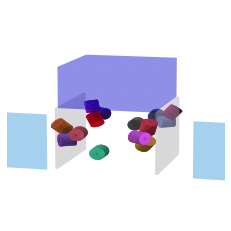

In [16]:
from gbmgeometry.spacecraft.fermi import *


f = Fermi(quaternion=interp.quaternion(0) , sc_pos=interp.sc_pos(0))
f.plot_fermi(color_dets_different=True, plot_det_label=False);

## computing intersections

It is sometimes required to see if photons from a GRB are blocked by spacecraft parts for a given detector. We can test this with the Fermi object:


In [17]:
f.add_ray(ray_coordinate=grb)

we can specify to compute for a subset of detectors

In [18]:
f.compute_intersections("n1","n2")

OrderedDict([('n1',
              OrderedDict([(0,
                            OrderedDict([('surface', ['LAT Radiator+ -y']),
                                         ('point',
                                          [array([81.46506793, 96.2       , 41.55346871])]),
                                         ('distance',
                                          [43.19931864505643])]))])),
             ('n2',
              OrderedDict([(0,
                            OrderedDict([('surface', ['LAT Radiator+ -y']),
                                         ('point',
                                          [array([77.03030294, 96.2       , 49.26398105])]),
                                         ('distance',
                                          [70.33735217701951])]))]))])

or compute for all detectors

In [19]:
f.compute_intersections()

OrderedDict([('n0',
              OrderedDict([(0,
                            OrderedDict([('surface', ['LAT Radiator+ -y']),
                                         ('point',
                                          [array([82.84222535, 96.2       , 86.97456421])]),
                                         ('distance',
                                          [29.16877080456398])]))])),
             ('n1',
              OrderedDict([(0,
                            OrderedDict([('surface', ['LAT Radiator+ -y']),
                                         ('point',
                                          [array([81.46506793, 96.2       , 41.55346871])]),
                                         ('distance',
                                          [43.19931864505643])]))])),
             ('n2',
              OrderedDict([(0,
                            OrderedDict([('surface', ['LAT Radiator+ -y']),
                                         ('point',
                                

Finally, we can plot this

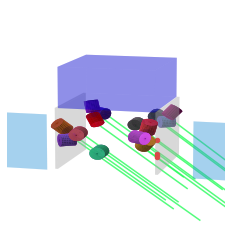

In [20]:
f.plot_fermi(color_dets_different=True, plot_det_label=False, with_intersections=True, with_rays=True);